## Data Science Challenge - Ranking

Candidate: Ali Barış Bilen<br>Date of start: 11.01.2021<br>Date of finish: 11.03.2021<br>Total time spent on the case: ~14 hours<br>
Dataset: Microsoft LETOR 4.0 (MQ2007 Supervised) 

In [1]:
# Importing libraries

import pandas as pd
import getpass
import numpy as np
import gc
from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ndcg_score
import time

In [2]:
#Specifying file locations
if getpass.getuser() == "asus":
    file_path = "C:/Users/asus/Desktop/cicek_case/"
    
if getpass.getuser() == "your computers name":
    file_path = "C:/Users/..file location..."  

In [3]:
data = pd.read_csv(file_path +'data.csv',header=None)
pd.set_option("display.max_colwidth", None)

## 1) Data Cleaning

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
data.head(1)

,0
0,0 qid:10 1:0.000000 2:0.000000 3:0.000000 4:0.000000 5:0.000000 6:7.240045 7:23.625574 8:22.686609 9:26.509571 10:7.195383 11:0.000000 12:0.000000 13:0.000000 14:0.000000 15:0.000000 16:61.000000 17:0.000000 18:4.000000 19:5.000000 20:70.000000 21:0.000000 22:NULL 23:NULL 24:NULL 25:0.000000 26:NULL 27:NULL 28:NULL 29:0.000000 30:NULL 31:NULL 32:NULL 33:0.000000 34:NULL 35:NULL 36:NULL 37:0.000000 38:NULL 39:NULL 40:NULL 41:0.150000 42:0.000000 43:3.000000 44:1.000000 45:17.000000 46:0.000000 #docid=GX000-00-0000000


In [6]:
data = data[0].str.split(' ', expand=True) #parsing

In [7]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0,qid:10,1:0.000000,2:0.000000,3:0.000000,4:0.000000,5:0.000000,6:7.240045,7:23.625574,8:22.686609,9:26.509571,10:7.195383,11:0.000000,12:0.000000,13:0.000000,14:0.000000,15:0.000000,16:61.000000,17:0.000000,18:4.000000,19:5.000000,20:70.000000,21:0.000000,22:NULL,23:NULL,24:NULL,25:0.000000,26:NULL,27:NULL,28:NULL,29:0.000000,30:NULL,31:NULL,32:NULL,33:0.000000,34:NULL,35:NULL,36:NULL,37:0.000000,38:NULL,39:NULL,40:NULL,41:0.150000,42:0.000000,43:3.000000,44:1.000000,45:17.000000,46:0.000000,#docid=GX000-00-0000000
1,1,qid:10,1:115.000000,2:4.000000,3:2.000000,4:1.000000,5:122.000000,6:7.240045,7:23.625574,8:22.686609,9:26.509571,10:7.195383,11:119.944860,12:25.298405,13:12.240774,14:10.219782,15:135.698616,16:1323.000000,17:8.000000,18:4.000000,19:7.000000,20:1342.000000,21:15.273403,22:-17.557298,23:-19.906099,24:-17.540301,25:12.408097,26:-18.974187,27:-24.888355,28:-20.841912,29:14.477069,30:-19.552044,31:-26.055079,32:-21.316321,33:15.891557,34:-28.765480,35:-32.156314,36:-33.504631,37:15.396945,38:-17.417649,39:-19.775857,40:-17.402933,41:0.395218,42:12.000000,43:15.000000,44:3.000000,45:56.000000,46:0.000000,#docid=GX000-24-12369390
2,1,qid:10,1:289.000000,2:1.000000,3:2.000000,4:2.000000,5:294.000000,6:7.240045,7:23.625574,8:22.686609,9:26.509571,10:7.195383,11:556.438144,12:6.890669,13:12.292239,14:11.104059,15:570.305074,16:5367.000000,17:9.000000,18:17.000000,19:11.000000,20:5404.000000,21:15.447145,22:-18.658403,23:-19.453084,24:-19.007537,25:3.591283,26:-24.989076,27:-27.293846,28:-29.380492,29:4.943883,30:-25.813180,31:-28.191243,32:-30.745716,33:10.561270,34:-32.700616,35:-35.939719,36:-37.928051,37:15.466790,38:-18.658086,39:-19.455287,40:-19.006910,41:0.156656,42:1.000000,43:13.000000,44:6.000000,45:76.000000,46:0.000000,#docid=GX000-62-7863450
3,1,qid:10,1:70.000000,2:6.000000,3:4.000000,4:3.000000,5:83.000000,6:7.240045,7:23.625574,8:22.686609,9:26.509571,10:7.195383,11:109.298570,12:39.457449,13:24.533013,14:21.323841,15:147.476787,16:924.000000,17:14.000000,18:14.000000,19:12.000000,20:964.000000,21:21.036294,22:-15.856849,23:-19.051095,24:-16.258344,25:13.279773,26:-12.180044,27:-23.456461,28:-9.570798,29:12.138884,30:-16.296429,31:-24.839068,32:-15.760847,33:23.095810,34:-22.929152,35:-30.459842,36:-25.224131,37:21.859366,38:-15.314050,39:-18.511568,40:-15.730176,41:0.160588,42:2.000000,43:7.000000,44:6.000000,45:95.000000,46:0.000000,#docid=GX016-48-5543459
4,0,qid:10,1:145.000000,2:0.000000,3:3.000000,4:1.000000,5:149.000000,6:7.240045,7:23.625574,8:22.686609,9:26.509571,10:7.195383,11:186.026181,12:0.000000,13:18.438358,14:5.552030,15:198.847019,16:2412.000000,17:3.000000,18:18.000000,19:7.000000,20:2440.000000,21:13.428959,22:-18.781663,23:-20.185657,24:-18.948775,25:0.000000,26:NULL,27:NULL,28:NULL,29:6.410428,30:-25.935309,31:-27.889633,32:-30.397523,33:8.633295,34:-33.426615,35:-36.458106,36:-38.169176,37:13.468660,38:-18.763536,39:-20.164010,40:-18.930452,41:0.196897,42:1.000000,43:6.000000,44:3.000000,45:36.000000,46:0.000000,#docid=GX037-87-3082362


In [8]:
print("Total number of rows in dataset is {}".format(data.shape[0]))
print("Total number of columns in dataset is {}".format(data.shape[1]))

Total number of rows in dataset is 69623
Total number of columns in dataset is 49


In [9]:
data = data.rename({0:'relevance_label',1:'query_id',48:'doc_id'},axis=1)

In [10]:
for i in list(range(2,11)):
    data[i] = data[i].str[2:]

In [11]:
for i in list(range(11,48)):
    data[i] = data[i].str[3:]

In [12]:
data.head(2)

,relevance_label,query_id,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,doc_id
0,0,qid:10,0.000000,0.000000,0.000000,0.000000,0.000000,7.240045,23.625574,22.686609,26.509571,7.195383,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,4.000000,5.000000,70.000000,0.000000,NULL,NULL,NULL,0.000000,NULL,NULL,NULL,0.000000,NULL,NULL,NULL,0.000000,NULL,NULL,NULL,0.000000,NULL,NULL,NULL,0.150000,0.000000,3.000000,1.000000,17.000000,0.000000,#docid=GX000-00-0000000
1,1,qid:10,115.000000,4.000000,2.000000,1.000000,122.000000,7.240045,23.625574,22.686609,26.509571,7.195383,119.944860,25.298405,12.240774,10.219782,135.698616,1323.000000,8.000000,4.000000,7.000000,1342.000000,15.273403,-17.557298,-19.906099,-17.540301,12.408097,-18.974187,-24.888355,-20.841912,14.477069,-19.552044,-26.055079,-21.316321,15.891557,-28.765480,-32.156314,-33.504631,15.396945,-17.417649,-19.775857,-17.402933,0.395218,12.000000,15.000000,3.000000,56.000000,0.000000,#docid=GX000-24-12369390


In [13]:
data.info(memory_usage='deep') #checking memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69623 entries, 0 to 69622
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   relevance_label  69623 non-null  object
 1   query_id         69623 non-null  object
 2   2                69623 non-null  object
 3   3                69623 non-null  object
 4   4                69623 non-null  object
 5   5                69623 non-null  object
 6   6                69623 non-null  object
 7   7                69623 non-null  object
 8   8                69623 non-null  object
 9   9                69623 non-null  object
 10  10               69623 non-null  object
 11  11               69623 non-null  object
 12  12               69623 non-null  object
 13  13               69623 non-null  object
 14  14               69623 non-null  object
 15  15               69623 non-null  object
 16  16               69623 non-null  object
 17  17               69623 non-null

Data consists of ~70k rows and memory usage is currently 212 mb, it seems I won't have any problems regarding the memory. So for now I don't need to cast objects into strings or any other data type.

In [14]:
if data.isna().sum().sum()!=0: #checking missing values
    print("There are missing values in data")
else:
    print("No missing values")

No missing values


In [15]:
data.head(5)

,relevance_label,query_id,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,doc_id
0,0,qid:10,0.000000,0.000000,0.000000,0.000000,0.000000,7.240045,23.625574,22.686609,26.509571,7.195383,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,4.000000,5.000000,70.000000,0.000000,NULL,NULL,NULL,0.000000,NULL,NULL,NULL,0.000000,NULL,NULL,NULL,0.000000,NULL,NULL,NULL,0.000000,NULL,NULL,NULL,0.150000,0.000000,3.000000,1.000000,17.000000,0.000000,#docid=GX000-00-0000000
1,1,qid:10,115.000000,4.000000,2.000000,1.000000,122.000000,7.240045,23.625574,22.686609,26.509571,7.195383,119.944860,25.298405,12.240774,10.219782,135.698616,1323.000000,8.000000,4.000000,7.000000,1342.000000,15.273403,-17.557298,-19.906099,-17.540301,12.408097,-18.974187,-24.888355,-20.841912,14.477069,-19.552044,-26.055079,-21.316321,15.891557,-28.765480,-32.156314,-33.504631,15.396945,-17.417649,-19.775857,-17.402933,0.395218,12.000000,15.000000,3.000000,56.000000,0.000000,#docid=GX000-24-12369390
2,1,qid:10,289.000000,1.000000,2.000000,2.000000,294.000000,7.240045,23.625574,22.686609,26.509571,7.195383,556.438144,6.890669,12.292239,11.104059,570.305074,5367.000000,9.000000,17.000000,11.000000,5404.000000,15.447145,-18.658403,-19.453084,-19.007537,3.591283,-24.989076,-27.293846,-29.380492,4.943883,-25.813180,-28.191243,-30.745716,10.561270,-32.700616,-35.939719,-37.928051,15.466790,-18.658086,-19.455287,-19.006910,0.156656,1.000000,13.000000,6.000000,76.000000,0.000000,#docid=GX000-62-7863450
3,1,qid:10,70.000000,6.000000,4.000000,3.000000,83.000000,7.240045,23.625574,22.686609,26.509571,7.195383,109.298570,39.457449,24.533013,21.323841,147.476787,924.000000,14.000000,14.000000,12.000000,964.000000,21.036294,-15.856849,-19.051095,-16.258344,13.279773,-12.180044,-23.456461,-9.570798,12.138884,-16.296429,-24.839068,-15.760847,23.095810,-22.929152,-30.459842,-25.224131,21.859366,-15.314050,-18.511568,-15.730176,0.160588,2.000000,7.000000,6.000000,95.000000,0.000000,#docid=GX016-48-5543459
4,0,qid:10,145.000000,0.000000,3.000000,1.000000,149.000000,7.240045,23.625574,22.686609,26.509571,7.195383,186.026181,0.000000,18.438358,5.552030,198.847019,2412.000000,3.000000,18.000000,7.000000,2440.000000,13.428959,-18.781663,-20.185657,-18.948775,0.000000,NULL,NULL,NULL,6.410428,-25.935309,-27.889633,-30.397523,8.633295,-33.426615,-36.458106,-38.169176,13.468660,-18.763536,-20.164010,-18.930452,0.196897,1.000000,6.000000,3.000000,36.000000,0.000000,#docid=GX037-87-3082362


In [16]:
if 'NULL' in data.values:
    print("There are NULL values")
else:
    print("No NULL values")

There are NULL values


In [17]:
data[25].value_counts()

NULL          1603
-28.115724      39
-11.801862      36
-25.486837      26
-19.609594      26
              ... 
-15.360090       1
-9.765577        1
-12.283451       1
-9.909628        1
-10.187574       1
Name: 25, Length: 63109, dtype: int64

In [18]:
data.describe()

,relevance_label,query_id,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,doc_id
count,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623,69623
unique,3,1692,2173,84,29,11,2177,1691,1687,1689,1683,1692,55980,8715,6505,2545,57682,13307,242,103,54,13576,62909,63744,63185,63109,17384,19998,19697,18894,16486,19341,19026,18593,6128,8635,8133,8000,65568,66549,65852,65799,36716,610,431,23,261,2,65323
top,0,qid:2297,2.000000,0.000000,0.000000,0.000000,4.000000,6.308786,32.749148,24.052617,17.735707,5.982434,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,9.000000,70.000000,0.000000,NULL,NULL,NULL,0.000000,NULL,NULL,NULL,0.000000,NULL,NULL,NULL,0.000000,NULL,NULL,NULL,0.000000,NULL,NULL,NULL,0.150000,1.000000,0.000000,4.000000,51.000000,0.000000,#docid=GX000-00-0000000
freq,51632,147,2193,43716,39166,54873,1777,147,147,147,246,147,1603,43716,39166,54873,1395,888,11676,17495,13608,899,1603,1603,1603,1603,43716,43716,43716,43716,39166,39166,39166,39166,54873,54873,54873,54873,1395,1395,1395,1395,10163,30639,29104,20385,2146,69622,851


In [19]:
data.replace({'NULL':np.nan},inplace=True) #intentionally replacing NULLs with NaN, reason explained below

In [20]:
data.isna().sum()

relevance_label        0
query_id               0
2                      0
3                      0
4                      0
5                      0
6                      0
7                      0
8                      0
9                      0
10                     0
11                     0
12                     0
13                     0
14                     0
15                     0
16                     0
17                     0
18                     0
19                     0
20                     0
21                     0
22                     0
23                  1603
24                  1603
25                  1603
26                     0
27                 43716
28                 43716
29                 43716
30                     0
31                 39166
32                 39166
33                 39166
34                     0
35                 54873
36                 54873
37                 54873
38                     0
39                  1395


*************************************************************************

The reason for converting 'NULL' into NaN values is that NaN values are more suitable for counting, replacement and imputation purposes.

As far as I see there are many NULL values. To be honest, I have zero idea what those features actually mean. One possible approach might be to impute these NaN (I replaced NULLs with NaNs) with the mean of their columns. However, it seems that most of the columns with NaN values (all of them except 'PageRank' which is column 41) are non-ordinal (i.e. numeric values do not constitute some sort of ordinal relationship) so they cannot and shouldn't be imputed with mean values. Since those mean values will imply nothing.

Another approach might be to remove the rows with NaN values, but this approach is not preferable either because it will leave us only 16k rows.

I choose to give up on these columns (except 41, i.e. the 'PageRank'), I will remove them. I will impute PageRank with the mean value of the column.

In [21]:
data_v2 = data.drop([23,24,25,27,28,29,31,32,33,35,36,37,39,40],axis=1)

In [22]:
data_v2

,relevance_label,query_id,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,30,34,38,41,42,43,44,45,46,47,doc_id
0,0,qid:10,0.000000,0.000000,0.000000,0.000000,0.000000,7.240045,23.625574,22.686609,26.509571,7.195383,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,4.000000,5.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.150000,0.000000,3.000000,1.000000,17.000000,0.000000,#docid=GX000-00-0000000
1,1,qid:10,115.000000,4.000000,2.000000,1.000000,122.000000,7.240045,23.625574,22.686609,26.509571,7.195383,119.944860,25.298405,12.240774,10.219782,135.698616,1323.000000,8.000000,4.000000,7.000000,1342.000000,15.273403,12.408097,14.477069,15.891557,15.396945,-17.402933,0.395218,12.000000,15.000000,3.000000,56.000000,0.000000,#docid=GX000-24-12369390
2,1,qid:10,289.000000,1.000000,2.000000,2.000000,294.000000,7.240045,23.625574,22.686609,26.509571,7.195383,556.438144,6.890669,12.292239,11.104059,570.305074,5367.000000,9.000000,17.000000,11.000000,5404.000000,15.447145,3.591283,4.943883,10.561270,15.466790,-19.006910,0.156656,1.000000,13.000000,6.000000,76.000000,0.000000,#docid=GX000-62-7863450
3,1,qid:10,70.000000,6.000000,4.000000,3.000000,83.000000,7.240045,23.625574,22.686609,26.509571,7.195383,109.298570,39.457449,24.533013,21.323841,147.476787,924.000000,14.000000,14.000000,12.000000,964.000000,21.036294,13.279773,12.138884,23.095810,21.859366,-15.730176,0.160588,2.000000,7.000000,6.000000,95.000000,0.000000,#docid=GX016-48-5543459
4,0,qid:10,145.000000,0.000000,3.000000,1.000000,149.000000,7.240045,23.625574,22.686609,26.509571,7.195383,186.026181,0.000000,18.438358,5.552030,198.847019,2412.000000,3.000000,18.000000,7.000000,2440.000000,13.428959,0.000000,6.410428,8.633295,13.468660,-18.930452,0.196897,1.000000,6.000000,3.000000,36.000000,0.000000,#docid=GX037-87-3082362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69618,1,qid:9999,449.000000,0.000000,0.000000,1.000000,450.000000,10.653256,18.705713,19.374427,19.489234,10.646145,1612.495391,0.000000,0.000000,6.940916,1613.373325,16315.000000,7.000000,0.000000,7.000000,16329.000000,21.748452,0.000000,0.000000,10.792986,21.981979,-10.054257,0.325293,1.000000,0.000000,3.000000,47.000000,0.000000,#docid=GX257-84-1028396
69619,0,qid:9999,4.000000,0.000000,0.000000,0.000000,4.000000,10.653256,18.705713,19.374427,19.489234,10.646145,29.486677,0.000000,0.000000,0.000000,29.480870,241.000000,10.000000,0.000000,16.000000,267.000000,20.108774,0.000000,0.000000,0.000000,19.934861,-15.306220,0.155088,1.000000,0.000000,5.000000,102.000000,0.000000,#docid=GX265-29-11154737
69620,1,qid:9999,695.000000,1.000000,0.000000,1.000000,697.000000,10.653256,18.705713,19.374427,19.489234,10.646145,2374.774905,6.813557,0.000000,6.940916,2377.490285,17897.000000,5.000000,0.000000,12.000000,17914.000000,19.151020,5.422941,0.000000,8.716172,19.351932,-10.148040,0.159551,1.000000,0.000000,5.000000,56.000000,0.000000,#docid=GX271-46-6200638
69621,1,qid:9999,774.000000,3.000000,0.000000,1.000000,778.000000,10.653256,18.705713,19.374427,19.489234,10.646145,2711.731847,20.440670,0.000000,6.940916,2720.631935,28087.000000,17.000000,0.000000,7.000000,28111.000000,19.755434,5.358359,0.000000,10.792986,19.979268,-10.358825,0.289555,5.000000,0.000000,3.000000,40.000000,0.000000,#docid=GX271-93-2032487


In [23]:
data_v2[41] = pd.to_numeric(data_v2[41])

In [24]:
data_v2[41].fillna((data_v2[41].mean()),inplace=True)

In [25]:
data_v2.isna().sum().sum() #so far so good.

0

In [26]:
data_v2['query_id'] = data_v2['query_id'].str[4:]

In [27]:
data_v2['doc_id'] = data_v2['doc_id'].str[7:]

In [28]:
del data
gc.collect()

271

In [29]:
data_v2.head(2)

,relevance_label,query_id,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,30,34,38,41,42,43,44,45,46,47,doc_id
0,0,10,0.000000,0.000000,0.000000,0.000000,0.000000,7.240045,23.625574,22.686609,26.509571,7.195383,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,4.000000,5.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.900858,0.150000,0.000000,3.000000,1.000000,17.000000,0.000000,GX000-00-0000000
1,1,10,115.000000,4.000000,2.000000,1.000000,122.000000,7.240045,23.625574,22.686609,26.509571,7.195383,119.944860,25.298405,12.240774,10.219782,135.698616,1323.000000,8.000000,4.000000,7.000000,1342.000000,15.273403,12.408097,14.477069,15.891557,15.396945,-17.402933,0.395218,12.000000,15.000000,3.000000,56.000000,0.000000,GX000-24-12369390


Now the data is ready for analysis.

Data cleaning phase is over.

## 2) Exploratory Data Analysis

In [30]:
#setting some configurations to get nice-looking plots
set_config(display='diagram')
sns.set(style="ticks", color_codes=True)

In [31]:
#making independent variables numeric
cols = [i for i in data_v2.columns if i not in ["relevance_label","query_id","doc_id"]]
for col in cols:
    data_v2[col]=pd.to_numeric(data_v2[col])

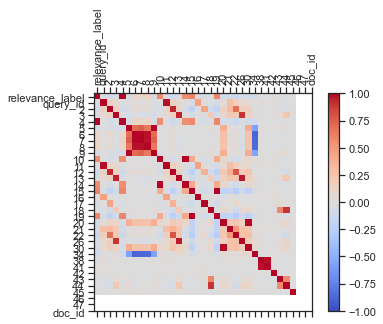

In [32]:
#Let's look at correlation plot
corr = data_v2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_v2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_v2.columns)
ax.set_yticklabels(data_v2.columns)
plt.show()

There are some highly correlated variables and they will have negative effect on our model if we leave them as they are.

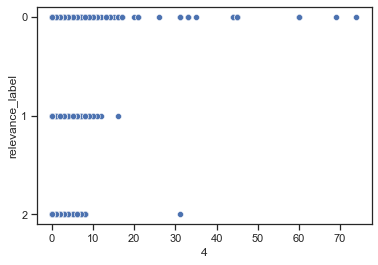

In [33]:
sns.scatterplot(x=4, y="relevance_label", data=data_v2);

It seems 4 is important when predicting relevance_label.

In [34]:
data_v2['relevance_label'] = pd.to_numeric(data_v2['relevance_label']) #this one should be numeric too

In [35]:
stats.pearsonr(data_v2[20], data_v2[30])

(-0.10662194736588844, 4.00564654277099e-175)

No, it turns out that they are not correlated (Pearson).

In [36]:
data_v2.corr().round(2) #investigating correlations this way is more convenient.

,relevance_label,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,30,34,38,41,42,43,44,45,46,47
relevance_label,1.00,0.02,0.03,0.03,0.02,0.02,-0.10,-0.08,-0.07,-0.05,-0.09,0.04,0.03,0.05,0.03,0.04,0.01,-0.01,-0.01,-0.07,0.01,0.20,0.08,0.06,0.04,0.20,0.18,-0.00,-0.00,-0.03,-0.02,-0.05,-0.00
2,0.02,1.00,-0.02,-0.08,-0.02,1.00,-0.06,0.11,0.09,0.12,-0.06,0.56,-0.02,-0.11,-0.04,0.55,0.59,-0.01,-0.06,-0.02,0.59,-0.07,-0.08,-0.13,-0.04,-0.08,-0.11,-0.00,-0.00,0.00,-0.01,-0.02,-0.00
3,0.03,-0.02,1.00,0.14,0.07,-0.01,-0.02,0.02,0.01,0.02,-0.02,-0.01,0.98,0.14,0.07,0.01,-0.06,0.47,0.02,-0.03,-0.06,0.04,0.29,0.16,0.07,0.06,-0.00,0.03,0.02,0.03,-0.03,-0.02,0.00
4,0.03,-0.08,0.14,1.00,0.14,-0.08,-0.04,0.06,0.03,0.05,-0.04,-0.07,0.12,0.94,0.13,-0.06,-0.20,0.00,0.44,-0.08,-0.20,0.13,0.31,0.69,0.15,0.16,-0.02,-0.00,-0.00,0.01,-0.01,-0.06,0.01
5,0.02,-0.02,0.07,0.14,1.00,-0.02,-0.05,-0.02,-0.03,-0.05,-0.05,-0.00,0.07,0.14,0.94,0.00,-0.08,-0.01,-0.00,0.19,-0.08,0.11,0.21,0.20,0.89,0.12,0.04,0.00,-0.00,-0.00,0.06,0.22,0.00
6,0.02,1.00,-0.01,-0.08,-0.02,1.00,-0.06,0.11,0.09,0.12,-0.06,0.56,-0.01,-0.11,-0.04,0.55,0.59,-0.00,-0.05,-0.02,0.59,-0.07,-0.08,-0.13,-0.04,-0.08,-0.11,-0.00,-0.00,0.00,-0.01,-0.02,-0.00
7,-0.10,-0.06,-0.02,-0.04,-0.05,-0.06,1.00,0.70,0.74,0.65,1.00,0.01,-0.00,0.02,-0.01,0.01,-0.02,-0.00,0.01,0.04,-0.02,0.39,0.02,0.02,-0.02,0.40,-0.57,0.00,0.00,0.00,0.03,0.04,0.00
8,-0.08,0.11,0.02,0.06,-0.02,0.11,0.70,1.00,0.98,0.97,0.70,-0.01,0.01,0.04,-0.02,-0.01,0.01,-0.01,-0.00,-0.01,0.01,0.26,0.03,0.03,-0.03,0.26,-0.89,-0.00,-0.00,-0.01,-0.01,-0.01,0.00
9,-0.07,0.09,0.01,0.03,-0.03,0.09,0.74,0.98,1.00,0.97,0.74,-0.01,0.01,0.04,-0.02,-0.01,0.01,-0.01,-0.00,0.01,0.01,0.28,0.03,0.02,-0.03,0.28,-0.87,-0.00,-0.00,-0.01,-0.00,0.01,0.00
10,-0.05,0.12,0.02,0.05,-0.05,0.12,0.65,0.97,0.97,1.00,0.65,-0.02,0.01,0.04,-0.04,-0.02,0.01,-0.01,-0.00,-0.00,0.01,0.25,0.04,0.03,-0.05,0.25,-0.86,-0.00,-0.00,-0.02,-0.00,-0.00,0.00


Text(0.5, 1.0, 'Correlation matrix')

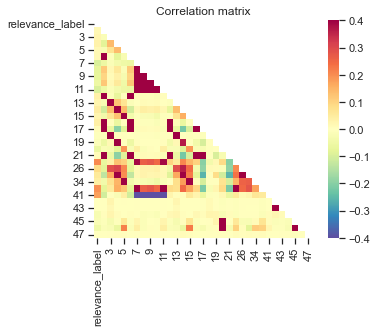

In [37]:
corrs = data_v2.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

Findings:\
    - 7,8,9,10 and 11 are highly correlated (minimum 70% correlation between the pairs of these four)\
    - Pairs (13,3), (14,4) and (15,5) are highly correlated (minimum 94% correlation) \
    - 46 and 20 are correlated (90%)\
    - 43 and 42 are correlated (92%)\
    - 8,9,10 and 41 are negatively correlated (-86%)\
    - 38 and 22 are correlated (99%)\
    - 30 and 4 are correlated (69%)\
    - (14,30) and (15,34) are correlated (78% and 96%)

Above pairs are highly correlated. This may cause some collinearity problems if we use a linear model. \
This may result in unstable parameter estimates of regression, making it very difficult to evaluate the effect of independent variables on dependent variable. The standard error of such parameters becomes very high and predictive power is drastically reduced. \
\
Even if we don't use a linear model, multicollinearity is still an undesirable thing because these variables \
potentially increase the computation time (curse of dimensionality: simple models are faster), decrease the interpretability while bring zero additional information to the model.\
\
We have to fix this before constructing the model.

There are many ways to deal with highly correlated variables. These methods include \
removing some of the columns, summing them up an take the resulting column, a penalized likelihood function (Ridge, Lasso, etc.) or Principal Component Analysis (PCA).

Removal/combination are fairly simple techniques. I also don't want to use PCA, \
because its interpretability is quite low for this task, at least in my opinion.
For this case, I am going to use Lasso. It also enables us to perform feature selection, unlike Ridge.

In [38]:
data_v2.head(1)

,relevance_label,query_id,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,30,34,38,41,42,43,44,45,46,47,doc_id
0,0,10,0.0,0.0,0.0,0.0,0.0,7.240045,23.625574,22.686609,26.509571,7.195383,0.0,0.0,0.0,0.0,0.0,61.0,0.0,4.0,5.0,70.0,0.0,0.0,0.0,0.0,0.0,-23.900858,0.15,0.0,3.0,1.0,17.0,0.0,GX000-00-0000000


In [39]:
#throwing dependent variable to the end of the data frame
temp_cols=data_v2.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
data_v2=data_v2[new_cols]

In [40]:
data_v2.head(1)

,query_id,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,30,34,38,41,42,43,44,45,46,47,doc_id,relevance_label
0,10,0.0,0.0,0.0,0.0,0.0,7.240045,23.625574,22.686609,26.509571,7.195383,0.0,0.0,0.0,0.0,0.0,61.0,0.0,4.0,5.0,70.0,0.0,0.0,0.0,0.0,0.0,-23.900858,0.15,0.0,3.0,1.0,17.0,0.0,GX000-00-0000000,0


In [41]:
data_v2['doc_id'].describe()

count                69623
unique               65323
top       GX000-00-0000000
freq                   851
Name: doc_id, dtype: object

In [42]:
data_v2['doc_id'].value_counts()

GX000-00-0000000     851
GX000-08-9442355      24
GX000-02-1745299      14
GX068-35-11938400     13
GX000-38-9492606      10
                    ... 
GX013-61-7365662       1
GX015-00-6559260       1
GX017-44-7675517       1
GX023-86-7584571       1
GX272-49-4405619       1
Name: doc_id, Length: 65323, dtype: int64

In [43]:
data_v2['concat_id'] = data_v2['query_id'] + '_' + data_v2['doc_id'] #I concatenate these two ids into a single id column, and this column will be used later in prediction stage.

<ipython-input-43-5c7f7c769a16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v2['concat_id'] = data_v2['query_id'] + '_' + data_v2['doc_id'] #I concatenate these two ids into a single id column, and this column will be used later in prediction stage.


In [44]:
data_v3 = data_v2.drop(['query_id','doc_id','concat_id'],axis=1)

In [45]:
data_v3.head(1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,30,34,38,41,42,43,44,45,46,47,relevance_label
0,0.0,0.0,0.0,0.0,0.0,7.240045,23.625574,22.686609,26.509571,7.195383,0.0,0.0,0.0,0.0,0.0,61.0,0.0,4.0,5.0,70.0,0.0,0.0,0.0,0.0,0.0,-23.900858,0.15,0.0,3.0,1.0,17.0,0.0,0


In [46]:
X = data_v3.iloc[:, :-1].values
y = data_v3.iloc[:, -1].values

In [47]:
X

array([[  0.,   0.,   0., ...,   1.,  17.,   0.],
       [115.,   4.,   2., ...,   3.,  56.,   0.],
       [289.,   1.,   2., ...,   6.,  76.,   0.],
       ...,
       [695.,   1.,   0., ...,   5.,  56.,   0.],
       [774.,   3.,   0., ...,   3.,  40.,   0.],
       [613.,   1.,   0., ...,   5.,  54.,   0.]])

In [48]:
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 41) #splitting test and train sets

In [50]:
#Lasso is a linear model, we should apply feature scaling to normalize the range of these independent variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
#Setting up a pipeline to make the implementation of lasso look more elegant
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [52]:
#Grid search to find the optimal parameters for lasso
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [53]:
search.fit(X_train,y_train) #we implement grid search, output is quite messy.

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.321 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.320 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.317 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.332 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.321 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.325 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.323 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.321 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.336 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.325 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.325 total time=   0.1s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [54]:
search.best_params_ #Says that best value for alpha is 0.1

{'model__alpha': 0.1}

In [55]:
#We were interested in feature 'selection':
coefficients = search.best_estimator_.named_steps['model'].coef_

In [56]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01751699, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

Above output tells us that we should only use one variable. Non sense. \
I will try to apply Lasso again, but in different way.

In [57]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear')) #fitting Lasso regularization model
sel_.fit(sc.transform(X_train), y_train) #ignoring the error.

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [58]:
sel_.fit(X_train, np.ravel(y_train,order='C'))
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [59]:
X_train = pd.DataFrame(X_train)

In [60]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel_.estimator_.coef_ == 0)))

total features: 32
selected features: 32
features with coefficients shrank to zero: 3


Surprisingly Lasso proposes us to use all of the variables. I really wouldn't expect this. \
I think I am going to use another method to do feature selection, I am not really satisfied with Lasso. \
\
Most probably, the problem with Lasso is that our dataset contains non-linear relationships. That's why \
Lasso fails because it expects linear relationship.

Let's use Random Forest to see feature importances. Ensemble models deal with \
non-linear relationships sufficently well. \
"Tree-based strategies used by random forests naturally ranks by how well they improve the purity of the node. \
This mean decrease in impurity over all trees (called gini impurity)." source: https://chrisalbon.com/code/machine_learning/trees_and_forests/feature_selection_using_random_forest/

In [60]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 41)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=41)

In [61]:
classifier.feature_importances_

array([0.03832983, 0.0084301 , 0.00766974, 0.00420602, 0.04333764,
       0.05437324, 0.04808334, 0.04851856, 0.04981979, 0.04851821,
       0.0415353 , 0.01601887, 0.01924068, 0.00930469, 0.04020948,
       0.04412788, 0.02470272, 0.02419037, 0.02273056, 0.05009696,
       0.0533961 , 0.01743579, 0.02155875, 0.0104555 , 0.0545071 ,
       0.06862681, 0.03536645, 0.01783064, 0.02451185, 0.01753738,
       0.03532965, 0.        ])

In [62]:
feature_names = [f"feature {i}" for i in range(data_v3.shape[1]-1)] #minus one to exclude the target variable

In [63]:
feature_names

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8',
 'feature 9',
 'feature 10',
 'feature 11',
 'feature 12',
 'feature 13',
 'feature 14',
 'feature 15',
 'feature 16',
 'feature 17',
 'feature 18',
 'feature 19',
 'feature 20',
 'feature 21',
 'feature 22',
 'feature 23',
 'feature 24',
 'feature 25',
 'feature 26',
 'feature 27',
 'feature 28',
 'feature 29',
 'feature 30',
 'feature 31']

In [64]:
import time
start_time = time.time()
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.011 seconds


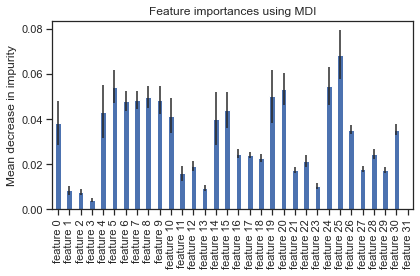

In [65]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")       # I use impurity based importance.
fig.tight_layout()

<BarContainer object of 32 artists>

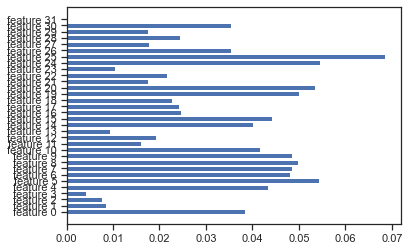

In [66]:
plt.barh(feature_names, classifier.feature_importances_)

Looking at the above plots, we can identify unimportant variables for our model. \
However, the problem with high correlations among some variables is still not resolved.

-------------------------------------------------------------------

I choose to remove those correlated columns. I guess it's simple but sufficiently effective approach. \
When removing the columns, I also don't forget to consider the above plots showing feature importances.

In [67]:
features = list(data_v3.columns)

In [68]:
features.remove('relevance_label')

In [69]:
features_df = pd.DataFrame({'features_defined':feature_names,'original_features':features})

In [70]:
#to see which feature name corresponds to which original feature
features_df

,features_defined,original_features
0,feature 0,2
1,feature 1,3
2,feature 2,4
3,feature 3,5
4,feature 4,6
5,feature 5,7
6,feature 6,8
7,feature 7,9
8,feature 8,10
9,feature 9,11


In [71]:
len(feature_names)

32

    - 7,8,9,10 and 11 are highly correlated (minimum 70% correlation between the pairs of these four)\
    - Pairs (13,3), (14,4) and (15,5) are highly correlated (minimum 94% correlation) \
    - 46 and 20 are correlated (90%)\
    - 43 and 42 are correlated (92%)\
    - 8,9,10 and 41 are negatively correlated (-86%)\
    - 38 and 22 are correlated (99%)\
    - 30 and 4 are correlated (69%)\
    - (14,30) and (15,34) are correlated (78% and 96%)

Feature_names 1,2,3,11,13,21,23,27,29, 47 seem unimportant. \
Considering my findings and the above plots, I decide to remove the following (original) variables: 
 - 3,4,5,15,34,13,26,43,45,47 (because they are not important) 
 - 20 (it is the less important element of one of the highly correlated pairs, no need to bother ourselves with other pairs as most of them \
 will be disappeared when we remove the unimportant columns) 

Why I don't touch the other correlated variables, such as 7,8,9,10,38,22 ? \
Answer: I've previously decided to use non-linear model and such correlations are \
not 'big' problems for them. These variables seem important for the model. \
I don't want to give up on the predictive power that they will bring to the model. 

In [72]:
data_v3

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,30,34,38,41,42,43,44,45,46,47,relevance_label
0,0.0,0.0,0.0,0.0,0.0,7.240045,23.625574,22.686609,26.509571,7.195383,0.000000,0.000000,0.000000,0.000000,0.000000,61.0,0.0,4.0,5.0,70.0,0.000000,0.000000,0.000000,0.000000,0.000000,-23.900858,0.150000,0.0,3.0,1.0,17.0,0.0,0
1,115.0,4.0,2.0,1.0,122.0,7.240045,23.625574,22.686609,26.509571,7.195383,119.944860,25.298405,12.240774,10.219782,135.698616,1323.0,8.0,4.0,7.0,1342.0,15.273403,12.408097,14.477069,15.891557,15.396945,-17.402933,0.395218,12.0,15.0,3.0,56.0,0.0,1
2,289.0,1.0,2.0,2.0,294.0,7.240045,23.625574,22.686609,26.509571,7.195383,556.438144,6.890669,12.292239,11.104059,570.305074,5367.0,9.0,17.0,11.0,5404.0,15.447145,3.591283,4.943883,10.561270,15.466790,-19.006910,0.156656,1.0,13.0,6.0,76.0,0.0,1
3,70.0,6.0,4.0,3.0,83.0,7.240045,23.625574,22.686609,26.509571,7.195383,109.298570,39.457449,24.533013,21.323841,147.476787,924.0,14.0,14.0,12.0,964.0,21.036294,13.279773,12.138884,23.095810,21.859366,-15.730176,0.160588,2.0,7.0,6.0,95.0,0.0,1
4,145.0,0.0,3.0,1.0,149.0,7.240045,23.625574,22.686609,26.509571,7.195383,186.026181,0.000000,18.438358,5.552030,198.847019,2412.0,3.0,18.0,7.0,2440.0,13.428959,0.000000,6.410428,8.633295,13.468660,-18.930452,0.196897,1.0,6.0,3.0,36.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69618,449.0,0.0,0.0,1.0,450.0,10.653256,18.705713,19.374427,19.489234,10.646145,1612.495391,0.000000,0.000000,6.940916,1613.373325,16315.0,7.0,0.0,7.0,16329.0,21.748452,0.000000,0.000000,10.792986,21.981979,-10.054257,0.325293,1.0,0.0,3.0,47.0,0.0,1
69619,4.0,0.0,0.0,0.0,4.0,10.653256,18.705713,19.374427,19.489234,10.646145,29.486677,0.000000,0.000000,0.000000,29.480870,241.0,10.0,0.0,16.0,267.0,20.108774,0.000000,0.000000,0.000000,19.934861,-15.306220,0.155088,1.0,0.0,5.0,102.0,0.0,0
69620,695.0,1.0,0.0,1.0,697.0,10.653256,18.705713,19.374427,19.489234,10.646145,2374.774905,6.813557,0.000000,6.940916,2377.490285,17897.0,5.0,0.0,12.0,17914.0,19.151020,5.422941,0.000000,8.716172,19.351932,-10.148040,0.159551,1.0,0.0,5.0,56.0,0.0,1
69621,774.0,3.0,0.0,1.0,778.0,10.653256,18.705713,19.374427,19.489234,10.646145,2711.731847,20.440670,0.000000,6.940916,2720.631935,28087.0,17.0,0.0,7.0,28111.0,19.755434,5.358359,0.000000,10.792986,19.979268,-10.358825,0.289555,5.0,0.0,3.0,40.0,0.0,1


In [51]:
data_v4 = data_v3.drop([3,4,5,15,34,13,26,43,45,20,47],axis=1)

In [52]:
data_v4.head(2)

,2,6,7,8,9,10,11,12,14,16,17,18,19,21,22,30,38,41,42,44,46,relevance_label
0,0.0,0.0,7.240045,23.625574,22.686609,26.509571,7.195383,0.00000,0.000000,0.000000,61.0,0.0,4.0,70.0,0.000000,0.000000,0.000000,-23.900858,0.150000,3.0,17.0,0
1,115.0,122.0,7.240045,23.625574,22.686609,26.509571,7.195383,119.94486,12.240774,135.698616,1323.0,8.0,4.0,1342.0,15.273403,14.477069,15.396945,-17.402933,0.395218,15.0,56.0,1


I am going to build a random forest model on this data_v4.

In [53]:
model = make_pipeline(StandardScaler(), RandomForestClassifier())
model

model.named_steps

{'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier()}

In [54]:
X = data_v4.iloc[:, :-1].values #model matrix
y = data_v4.iloc[:, -1].values  #target vector

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 41) #splitting test and train sets

In [59]:
start = time.time()
model.fit(X_train, y_train) #fitting the model
elapsed_time = time.time() - start
print('total elapsed time to fit the random forest model: ' ,elapsed_time)

total elapsed time to fit the random forest model:  15.97284483909607


In [60]:
#cross-validating the model to better see the generalization performance of the model (prediction performance on the unseen data)
#%%time
cv_result = cross_validate(model, X, y, cv=5) # with 5 folds
cv_result

{'fit_time': array([15.75804019, 15.54159975, 15.41678667, 16.16959262, 15.49687076]),
 'score_time': array([0.26671433, 0.26703882, 0.26730561, 0.27221608, 0.26829529]),
 'test_score': array([0.74692998, 0.74405745, 0.74355476, 0.74044815, 0.73814996])}

In [61]:
scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}") 

The mean cross-validation accuracy is: 0.743 +/- 0.003


Hmm, 74% accuracy. Not good not terrible. At least it's promising. \
Let's continue with model selection and hyperparameter optimization.

In [62]:
model = make_pipeline(StandardScaler(), GaussianNB()) #Trying Gaussian Naive Bayes
model

model.named_steps

start = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start

cv_result = cross_validate(model, X, y, cv=5)
cv_result

scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.273 +/- 0.015


Naive Bayes performs terrible, even worse than random guessing. (there are 3 relevance labels so each has 33% occurrence probability)

In [63]:
model = make_pipeline(StandardScaler(), LogisticRegression()) #Trying Gaussian Naive Bayes
model

model.named_steps

start = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start

cv_result = cross_validate(model, X, y, cv=5)
cv_result

scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

C:\Users\asus\AppData\Local\R-MINI~1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\AppData\Local\R-MINI~1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

The mean cross-validation accuracy is: 0.742 +/- 0.001


C:\Users\asus\AppData\Local\R-MINI~1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Please ignore these error messages, cv error of logistic regression is no better than random forest. \
Let's stick to random forest classifier and do some hyperparameter optimization.

In [64]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 41)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=41)

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
len(y_pred)

17406

In [67]:
base_ndcg = ndcg_score([y_test],[y_pred])
print('NDCG score of the base model is: ',base_ndcg)

NDCG score of the base model is:  0.9042463022742061


## Hyperparameter Tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [69]:
random_grid

{'n_estimators': [20, 26, 33, 40, 46, 53, 60, 66, 73, 80],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [70]:
# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations, and use all available cores, why 20? - to complete random search in reasonable amount of time in my 8 gb ram machine.
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=41, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=10,
                                                    random_state=41),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 26, 33, 40, 46, 53,
                                                         60, 66, 73, 80]},
                   random_state=41, verbose=2)

In [71]:
rf_random.best_params_ #giving us optimal parameters (within the ranges I specified)

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [72]:
#fitting the recommended model, it takes only a couple of seconds.
classifier = RandomForestClassifier(n_estimators = 60, min_samples_split = 2, min_samples_leaf=1, max_features='sqrt', max_depth = 60,
                                    criterion = 'entropy', bootstrap=False, random_state = 41)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=60,
                       max_features='sqrt', n_estimators=60, random_state=41)

In [73]:
y_pred = classifier.predict(X_test)

In [257]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [260]:
new_ndcg = ndcg_score([y_test],[y_pred])

In [261]:
new_ndcg

0.9166778932338314

In [76]:
print("Base model's NDCG score was: ",base_ndcg)
print("Optimized model's NDCG score is: ", new_ndcg)
print('Grid search provides {} % improvement'.format(round(new_ndcg-base_ndcg,3)))

Base model's NDCG score was:  0.9042463022742061
Optimized model's NDCG score is:  0.9166778932338314
Grid search provides 0.012 % improvement


## Model Serving API

I have tried Bento ML package to serve my model but couldn't manage to make it work. Sorry for that.

In [278]:
model_to_save = RandomForestClassifier(n_estimators = 60, min_samples_split = 2, min_samples_leaf=1, max_features='sqrt', max_depth = 60,criterion = 'entropy', bootstrap=False, random_state = 41)

#training model
model_to_save.fit(X_train, y_train)

import bentoml
from bentoml.frameworks.sklearn import SklearnModelArtifact
from bentoml.adapters import DataframeInput

@bentoml.env(infer_pip_packages=True)
@bentoml.artifacts([SklearnModelArtifact('model')])
class SklearnModelService(bentoml.BentoService):
    @bentoml.api(input=DataframeInput(), batch=True)
    def predict(self, df):
        result = self.artifacts.model_to_save.predict(df)
        return result
    
from api4_class import SklearnModelService

forest = SklearnModelService()
# Pack directly with sklearn model object
forest.pack('model', model_to_save)
forest.save()

KeyError: 'model'

-----------------------------------------

## Conclusion and Final Comments

What could be done better? 

1) While cross-validating my random forest model, I should have used NDCG score, as demanded in the ChallengeDocument.docx. However, there is no simple way (at least I couldn't find) to calculate NDCG or DCG scores within cross validation in Python. I had to use good old CV error, which is mean(|(y_real-y_pred)^2|), to choose my model among three candidates; logistic regression, naive bayes and random forest.

2) It would be nice if I tried more classifiers, such as SVM, Kernel SVM, K-nearest neighbors or LightGBM and expand the grid a little more (possibly with more iterations). The reason for trying only three models is that I think the aim of this case is to not fit various classifiers to find the best one, but rather to see my approach to the problem. And Random Forest generally does well with such classification tasks. After obtaining 91% of NDCG score, I saw no point in trying an LGBM model.

3) I would expect Lasso to help me more in feature selection, it didn't. There is possibly a mistake with my setting, parameters etc. It is easier to implement shrinkage methods in R rather than Python.

Comments

1) This is the first time I am dealing with a ranking task and 91% of NDCG score doesn't look so bad. For sure it can be improved significantly, but I guess 91% of accuracy is not terrible for a beginner.

2) I tried to make my code as much readable as possible with clear explanations and informative comments. I hope the evaluator will feel comfortable reviewing the code.

-----------------------------------------

End